In [1]:
#importing library for importing dataset
import pandas as pd
import numpy as np
df_headbrain=pd.read_csv("headbrain.csv")
df_headbrain.head()

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [2]:
# checking null values through simple visualisation technique:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_headbrain.isnull(),annot=True)
plt.show()

<Figure size 640x480 with 2 Axes>

In [3]:
# checkingg null values in the numerical technique:
df_headbrain.isnull().sum()

Gender         0
AgeRange       0
HeadSize       0
BrainWeight    0
dtype: int64

no null values presentin this dataset :

In [4]:
# checking for outliers present or not: & removing present outliers
from scipy.stats import zscore
z_score=abs(zscore(df_headbrain))
print(df_headbrain.shape)
df_headbrain_final=df_headbrain.loc[(z_score<3).all(axis=1)]
print(df_headbrain_final.shape)

(237, 4)
(236, 4)


In [5]:
df_headbrain_final.columns

Index(['Gender', 'AgeRange', 'HeadSize', 'BrainWeight'], dtype='object')

In [6]:
#finding the correlation between the culmns in the dataset
df_headbrain_final.corr()

,Gender,AgeRange,HeadSize,BrainWeight
Gender,1.000000,-0.093023,-0.513779,-0.463639
AgeRange,-0.093023,1.000000,-0.093618,-0.159401
HeadSize,-0.513779,-0.093618,1.000000,0.791692
BrainWeight,-0.463639,-0.159401,0.791692,1.000000


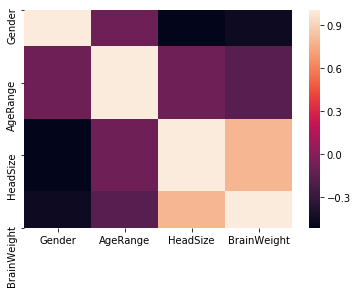

In [7]:
sns.heatmap(df_headbrain_final.corr())

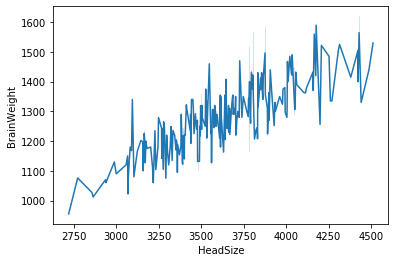

In [8]:
#lets check how BrainWeight is changing w.r.t Headsize
sns.lineplot(x=df_headbrain_final['HeadSize'],y=df_headbrain_final['BrainWeight'],data=df_headbrain_final)
plt.show() 

this graph clearly shows that with increase in Headsize there will be increase in BrainWeight

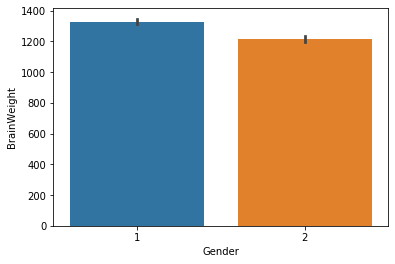

In [9]:
#checking avg weight size according to gender
sns.barplot(x=df_headbrain_final['Gender'],y=df_headbrain_final['BrainWeight'],data=df_headbrain)
plt.show()

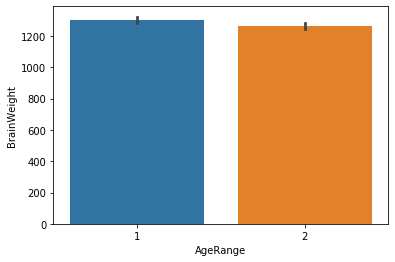

In [10]:
sns.barplot(x=df_headbrain_final['AgeRange'],y=df_headbrain_final['BrainWeight'],data=df_headbrain_final)
plt.show()

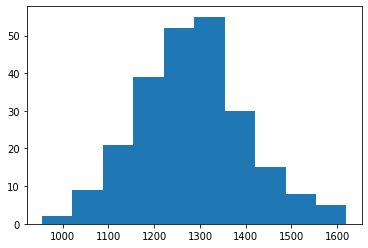

In [11]:
#histogram for brainweight:
plt.hist(x='BrainWeight',bins=10,data=df_headbrain_final)
plt.show()

In [12]:
#checking skewness in the data:
df_headbrain_final.skew()


Gender         0.257959
AgeRange      -0.153968
HeadSize       0.164767
BrainWeight    0.205274
dtype: float64

above shows acceptable level of skewness in data----->>>> (+0.5 ,-0.5) is the accecptable level of skewness.

In [13]:
df_headbrain_final

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [19]:
#lets separate the data in x and y for the regression problem:
x=df_headbrain_final.drop(['BrainWeight'], axis = 1)
y=df_headbrain_final['BrainWeight']
print(x.shape)
print(y.shape)

(236, 3)
(236,)


In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [21]:
x

array([[-0.88002051, -1.0794154 ,  2.46589809],
       [-0.88002051, -1.0794154 ,  0.30372296],
       [-0.88002051, -1.0794154 ,  1.7647276 ],
       [-0.88002051, -1.0794154 ,  0.41266977],
       [-0.88002051, -1.0794154 ,  1.53007294],
       [-0.88002051, -1.0794154 , -0.12368375],
       [-0.88002051, -1.0794154 ,  0.43501784],
       [-0.88002051, -1.0794154 , -0.19631495],
       [-0.88002051, -1.0794154 , -0.04546553],
       [-0.88002051, -1.0794154 ,  0.9853389 ],
       [-0.88002051, -1.0794154 , -0.52036187],
       [-0.88002051, -1.0794154 ,  1.01606748],
       [-0.88002051, -1.0794154 ,  0.02995919],
       [-0.88002051, -1.0794154 ,  1.61667168],
       [-0.88002051, -1.0794154 ,  0.56631271],
       [-0.88002051, -1.0794154 ,  0.68922706],
       [-0.88002051, -1.0794154 , -0.36951244],
       [-0.88002051, -1.0794154 , -0.45611119],
       [-0.88002051, -1.0794154 , -1.49250262],
       [-0.88002051, -1.0794154 ,  2.22006939],
       [-0.88002051, -1.0794154 ,  0.694

In [22]:
x.shape

(236, 3)

In [23]:
y = sc.fit_transform(y)
y

ValueError: Expected 2D array, got 1D array instead:
array=[1530. 1297. 1335. 1282. 1590. 1300. 1400. 1255. 1355. 1375. 1340. 1380.
 1355. 1522. 1208. 1405. 1358. 1292. 1340. 1400. 1357. 1287. 1275. 1270.
 1505. 1490. 1485. 1310. 1420. 1318. 1432. 1364. 1405. 1432. 1207. 1375.
 1350. 1236. 1250. 1350. 1320. 1525. 1570. 1340. 1422. 1506. 1215. 1311.
 1300. 1224. 1350. 1335. 1390. 1400. 1225. 1310. 1560. 1330. 1222. 1415.
 1175. 1330. 1485. 1470. 1135. 1310. 1154. 1510. 1415. 1468. 1390. 1380.
 1432. 1240. 1195. 1225. 1188. 1252. 1315. 1245. 1430. 1279. 1245. 1309.
 1412. 1120. 1220. 1280. 1440. 1370. 1192. 1230. 1346. 1290. 1165. 1240.
 1132. 1242. 1270. 1218. 1430. 1588. 1320. 1290. 1260. 1425. 1226. 1360.
 1620. 1310. 1250. 1295. 1290. 1290. 1275. 1250. 1270. 1362. 1300. 1173.
 1256. 1440. 1180. 1306. 1350. 1125. 1165. 1312. 1300. 1270. 1335. 1450.
 1310. 1027. 1235. 1260. 1165. 1080. 1127. 1270. 1252. 1200. 1290. 1334.
 1380. 1140. 1243. 1340. 1168. 1322. 1249. 1321. 1192. 1373. 1170. 1265.
 1235. 1302. 1241. 1078. 1520. 1460. 1075. 1280. 1180. 1250. 1190. 1374.
 1306. 1202. 1240. 1316. 1280. 1350. 1180. 1210. 1127. 1324. 1210. 1290.
 1100. 1280. 1175. 1160. 1205. 1163. 1022. 1243. 1350. 1237. 1204. 1090.
 1355. 1250. 1076. 1120. 1220. 1240. 1220. 1095. 1235. 1105. 1405. 1150.
 1305. 1220. 1296. 1175.  955. 1070. 1320. 1060. 1130. 1250. 1225. 1180.
 1178. 1142. 1130. 1185. 1012. 1280. 1103. 1408. 1300. 1246. 1380. 1350.
 1060. 1350. 1220. 1110. 1215. 1104. 1170. 1120.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [24]:
y.head()

0    1530
1    1297
2    1335
3    1282
4    1590
Name: BrainWeight, dtype: int64

In [26]:
y=np.array(y)
y

array([1530, 1297, 1335, 1282, 1590, 1300, 1400, 1255, 1355, 1375, 1340,
       1380, 1355, 1522, 1208, 1405, 1358, 1292, 1340, 1400, 1357, 1287,
       1275, 1270, 1505, 1490, 1485, 1310, 1420, 1318, 1432, 1364, 1405,
       1432, 1207, 1375, 1350, 1236, 1250, 1350, 1320, 1525, 1570, 1340,
       1422, 1506, 1215, 1311, 1300, 1224, 1350, 1335, 1390, 1400, 1225,
       1310, 1560, 1330, 1222, 1415, 1175, 1330, 1485, 1470, 1135, 1310,
       1154, 1510, 1415, 1468, 1390, 1380, 1432, 1240, 1195, 1225, 1188,
       1252, 1315, 1245, 1430, 1279, 1245, 1309, 1412, 1120, 1220, 1280,
       1440, 1370, 1192, 1230, 1346, 1290, 1165, 1240, 1132, 1242, 1270,
       1218, 1430, 1588, 1320, 1290, 1260, 1425, 1226, 1360, 1620, 1310,
       1250, 1295, 1290, 1290, 1275, 1250, 1270, 1362, 1300, 1173, 1256,
       1440, 1180, 1306, 1350, 1125, 1165, 1312, 1300, 1270, 1335, 1450,
       1310, 1027, 1235, 1260, 1165, 1080, 1127, 1270, 1252, 1200, 1290,
       1334, 1380, 1140, 1243, 1340, 1168, 1322, 12

In [27]:
y.shape

(236,)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=r_state,test_size=0.30)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state ", r_state,"is :",r2_scr)
    
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state = r_state
        
        
print()
print()
print("max r score corresponding to ",final_r_state,"is:",max_r_score)
        

r2_score corresponding to random state  42 is : 0.6462193494805646
r2_score corresponding to random state  43 is : 0.7236070967108654
r2_score corresponding to random state  44 is : 0.5240868911896708
r2_score corresponding to random state  45 is : 0.6713851361613121
r2_score corresponding to random state  46 is : 0.7022370795501127
r2_score corresponding to random state  47 is : 0.6788696993018636
r2_score corresponding to random state  48 is : 0.6601284719940325
r2_score corresponding to random state  49 is : 0.6786975283292387
r2_score corresponding to random state  50 is : 0.649478398423236
r2_score corresponding to random state  51 is : 0.5254091484586849
r2_score corresponding to random state  52 is : 0.7267067034175876
r2_score corresponding to random state  53 is : 0.670769999538779
r2_score corresponding to random state  54 is : 0.6317348185339762
r2_score corresponding to random state  55 is : 0.6606492454788905
r2_score corresponding to random state  56 is : 0.59322507691801

In [33]:
#lets do a cross val score
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y, cv=5,scoring="r2").mean()

0.4855213166049249

#the above cross val score is less and it shows that we need to further improve our model with more data

In [38]:
#since maximun r2 score is coingaround randomstate 92 , so we will form our model around that random state
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=92,test_size=0.20)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)


In [40]:
#lets evaluate RMSE and r2 score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("r2 score is :",r2_score(y_test,y_pred))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is : 0.7580070299154203
RMSE is : 57.309273702463955


In [41]:
#lets save the model using joblib
from sklearn.externals import joblib
#save the model as apickle file
#joblib.dump(lr , 'lr.headbrain.pkl')

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
